In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
from sklearn.datasets import fetch_openml

from sklearn.model_selection import train_test_split#模型选择
from sklearn.preprocessing import LabelEncoder#预处理
from sklearn.decomposition import PCA#主成分分析

from sklearn.naive_bayes import GaussianNB#高斯朴素贝叶斯算法

from collections import Counter
import math

**注意，目前的程序在进行预测的时候暂时无法预测一维数据，原因在于X_test.shape[0]当X_test为只有一个样本时，为4，而不是多个样本时的样本数目，这一点后续熟练numpy的时候需要作调整**

### 满足高斯分布的朴素贝叶斯类

特征的可能性被假设为高斯

概率密度函数：
$$P(x_i | y_k)=\frac{1}{\sqrt{2\pi\sigma^2_{yk}}}exp(-\frac{(x_i-\mu_{yk})^2}{2\sigma^2_{yk}})$$

数学期望(mean)：$\mu$，方差：$\sigma^2=\frac{\sum(X-\mu)^2}{N}$


In [70]:
class NaiveBayes:
    def __init__(self):
        self.model = None

    @staticmethod
    # mathematical expectation
    def mean(X):
        return sum(X) / float(len(X))

    # standard deviation
    def stdev(self, X):
        avg = self.mean(X)
        return math.sqrt(sum([pow(x-avg, 2) for x in X]) / float(len(X)))

    # probability density function
    def gaussian_probability(self, x, mean, stdev):
        exponent = math.exp(-(math.pow(x-mean,2)/(2*math.pow(stdev,2))))
        return (1 / (math.sqrt(2*math.pi) * stdev)) * exponent

    # 处理X_train
    def summarize(self, train_data):
        summaries = [(self.mean(i), self.stdev(i)) for i in zip(*train_data)]
        return summaries

    # 分类别求出数学期望和标准差
    def train(self, X, y):
        labels = list(set(y))
        data = {label:[] for label in labels}#生成字典{0.0: [], 1.0: []}
        for f, label in zip(X, y):
            data[label].append(f)
        self.model = {label: self.summarize(value) for label, value in data.items()}
        return self.model

    # 计算概率
    def calculate_probabilities(self, input_data):
        probabilities = {}
        for label, value in self.model.items():
            probabilities[label] = 1
            for i in range(len(value)):
                mean, stdev = value[i]
                probabilities[label] *= self.gaussian_probability(input_data[i], mean, stdev)
        return probabilities
    
    # 类别
    def predict(self, X_test):
        label = list(range(X_test.shape[0]))
#         print(X_test.shape)
        for i in range(X_test.shape[0]):
            label[i] = sorted(self.calculate_probabilities(X_test[i,:]).items(), key=lambda x: x[-1])[-1][0]
        
        return label

    def score(self, X_test, y_test):
        right = 0
        for X, y in zip(X_test, y_test):
            label = self.predict(X)
            if label == y:
                right += 1

        return right / float(len(X_test))

### 1.使用朴素贝叶斯解决IRIS分类问题

In [71]:
iris = datasets.load_iris()
X=iris.data
y=iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

# x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
# y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
# plt.figure(2, figsize=(8, 6))
# plt.clf()
# plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,edgecolor='k')
# plt.xlabel('Sepal length')
# plt.ylabel('Sepal width')
# plt.title("IRIS dataset")
# plt.xlim(x_min, x_max)
# plt.ylim(y_min, y_max)
# plt.xticks(())
# plt.yticks(())
# plt.show()

model = NaiveBayes()
model.train(X_train, y_train)
y_pred = model.predict(X_test)
# print(y_pred)
print("IRIS:Number of mislabeled points out of a total %d points : %d, Acc: %f%%"
      % (X_test.shape[0], (y_test != y_pred).sum(),100*(y_test == y_pred).sum()/X_test.shape[0]))


IRIS:Number of mislabeled points out of a total 75 points : 3, Acc: 96.000000%


In [72]:
print(model.predict(X_test[0:2,:]))

[0, 1]


### 2 使用朴素贝叶斯解决手写数字分类问题

In [73]:
digits=fetch_openml(name='USPS',version=2,data_home='E:/scikit_learn_data')
X_d=digits.data
y_d=digits.target
y_u=np.unique(y_d)#查找数组中的唯一元素
enc = LabelEncoder()#使用0到n_classes-1之间的值对目标标签进行编码，
#链接https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
enc.fit(y_d)
name=enc.classes_
print(name)

y1=enc.transform(y_d)

X_reduced = PCA(n_components=30).fit_transform(X_d)#主成分分析，将像素提取成30个主成分

X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_reduced, y1, test_size=0.5, random_state=1)


model_d = NaiveBayes()
model_d.train(X_train_d, y_train_d)
y_pred_d = model_d.predict(X_test_d)

print("USPS:Number of mislabeled points out of a total %d points : %d, Acc: %f%%"
      %(X_test_d.shape[0], (y_test_d != y_pred_d).sum(),100*(y_test_d == y_pred_d).sum()/X_test_d.shape[0]))

USPS:Number of mislabeled points out of a total 4649 points : 514, Acc: 88.943859%


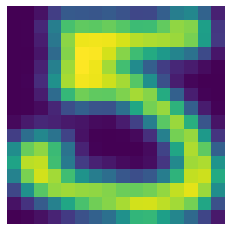

In [74]:
import matplotlib.pyplot as plt # plt 用于显示图片
import matplotlib.image as mpimg # mpimg 用于读取图片

plt.imshow(X_d[1].reshape(16,16)) # 显示图片
plt.axis('off') # 不显示坐标轴
plt.show()

(1797, 64)


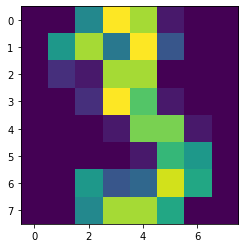

In [78]:
from sklearn import datasets
iris = datasets.load_iris()
digits = datasets.load_digits()
xx = digits.data
print(xx.shape)
plt.imshow(xx[3].reshape(8,8)) # 显示图片
plt.show()